# Python Numeric Integration Revisited

In [3]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

### Modeling

change와 관련된 간단한 식부터 시작하자.

$$
\frac{dH}{dt} = (Hare Birth Rate) - (Hare Death Rate) \\


\frac{dL}{dt} = (Lynx Birth Rate) - (Lynx Death Rate)
$$

#### Relevant Parameters

| Parameter | Symbol | Value |
| - | :----: | :---: |
| 시라소니/토끼 | $a$ | 3.2 |
| Lynx/Hare 전환율 | $b$ | 0.6 |
| Lynx/Hare 마이클상수?| $c$ | 50 |
| Lynx Death Rate | $d$ | 0.56 |
| Hare Carrying Capacity| $k$ | 125 |
| Hare 번식률 | $r$ | 1.6 |

#### Model Equations
These parameters can be used to form a model:

$$
\frac{dH}{dt} = rH(1 - \frac{H}{k}) - \frac{aHL}{c + H}  \\
\frac{dL}{dt} = a \frac{bHL}{c + H} - d*L
$$

이 튜토리얼의 초점은 이러한 모델 방정식의 개발에 있지 않지만, 방정식을 검토하고 이해하려고 노력하세요. 나중에 오류가 발생했을 때 디버깅 단계에 도움이 될 수 있습니다.

### Programming and Plotting

#### Step 1: Initialization

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### Step 2: Default Parameter Values

In [5]:
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

#### Step 3: Define the differential equations

In [8]:
def deriv(t, y):
    H, L = y
    dHdt = r*H*(1-H/k) - a*H*L/(c+H)
    dLdt = b*a*H*L/(c+H) - d*L
    return [dHdt, dLdt]

#### Step 4: Integrate Differential Equations

In [10]:
t = np.linspace(0, 70, 500)                             # time grid
IC = [20, 20]                                           # initial conditions for H and L
soln = solve_ivp(
    fun = deriv, 
    t_span=(t[0], t[-1]), 
    y0=IC, 
    t_eval=t
    )    # compute solution
H, L = soln.y                                           # unpack solution 

In [11]:
H

array([20.        , 21.24355551, 22.5588345 , 23.93736856, 25.36800699,
       26.83713435, 28.32867049, 29.82407051, 31.30232481, 32.73995905,
       34.11104872, 35.39284695, 36.55824399, 37.57725557, 38.42344779,
       39.07393709, 39.50939027, 39.71402446, 39.67560718, 39.38545625,
       38.83843989, 38.03297664, 36.97099899, 35.6694422 , 34.15953809,
       32.47411368, 30.64720472, 28.71405573, 26.71112001, 24.67605958,
       22.64774524, 20.66625655, 18.77288182, 17.00860242, 15.39044958,
       13.92859859, 12.63064865, 11.49802863, 10.52599698,  9.7036418 ,
        9.01388082,  8.43847427,  7.97285951,  7.6065051 ,  7.329749  ,
        7.1346646 ,  7.01506077,  6.9664818 ,  6.98620739,  7.07216262,
        7.2236034 ,  7.44177776,  7.72888417,  8.08807147,  8.52343891,
        9.04003615,  9.64386325, 10.34187066, 11.14195924, 12.04500988,
       13.05764034, 14.19787925, 15.47937315, 16.91134032, 18.49857074,
       20.24142613, 22.13583995, 24.17331734, 26.34093522, 28.62

In [12]:
L

array([20.        , 20.001376  , 20.07076377, 20.21000994, 20.42093624,
       20.70526177, 21.06460303, 21.50047395, 22.01428583, 22.60734741,
       23.28085061, 24.03085765, 24.85794492, 25.76615147, 26.7565548 ,
       27.82727086, 28.97345402, 30.18729712, 31.45803144, 32.77192669,
       34.11229105, 35.45947111, 36.79777567, 38.11549915, 39.37657701,
       40.54708467, 41.59676992, 42.49905286, 43.23102597, 43.77345404,
       44.11077423, 44.23109604, 44.12620131, 43.79191927, 43.23796715,
       42.48620637, 41.56031462, 40.48560514, 39.28902675, 37.99916385,
       36.6462364 , 35.25897193, 33.85477337, 32.45218512, 31.06740769,
       29.71378242, 28.40179144, 27.13905772, 25.93034513, 24.77985082,
       23.69169832, 22.66813172, 21.71094613, 20.82148775, 20.00065378,
       19.2488925 , 18.56620321, 17.95213626, 17.40579305, 16.92844243,
       16.52190221, 16.18515899, 15.91782517, 15.72015111, 15.59302512,
       15.53797346, 15.55716036, 15.65338798, 15.83009645, 16.09

In [13]:
len(H), len(L)

(500, 500)

#### Step 5: Plot 

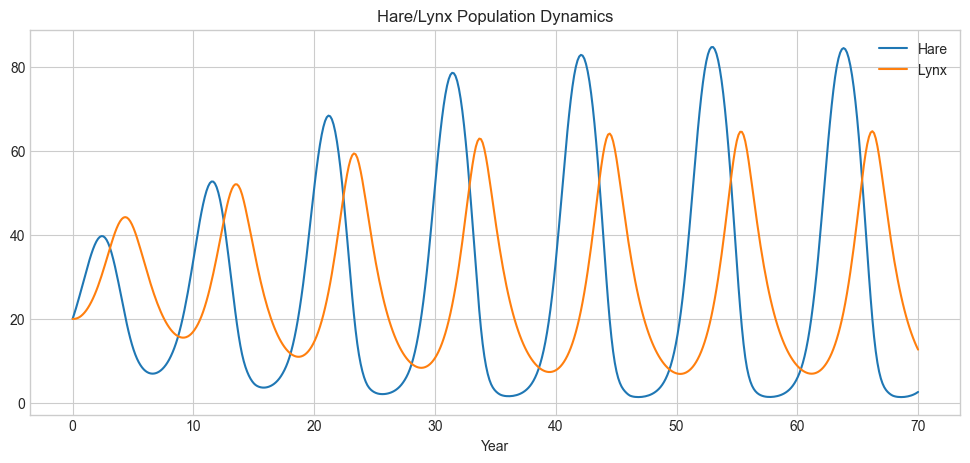

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(t, H, t,  L)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare', 'Lynx'])

Text(0.5, 0, 'Hare')

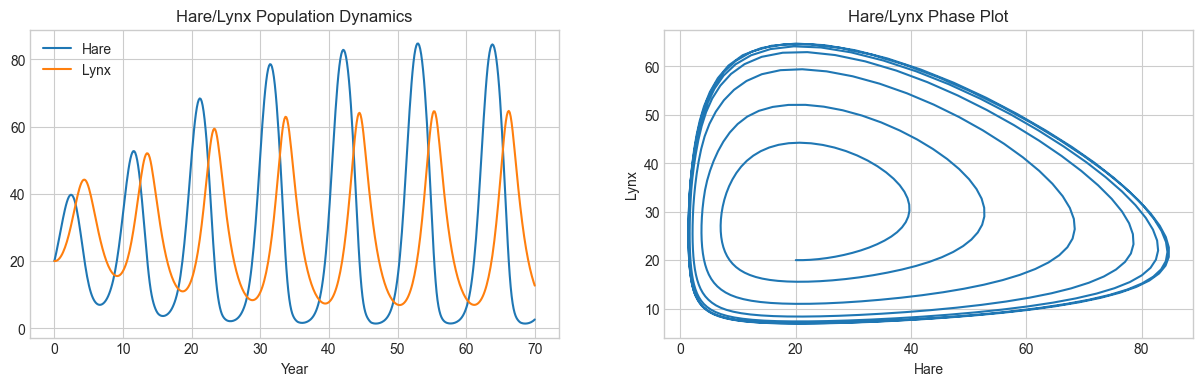

In [15]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(t, H, t, L)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare', 'Lynx'])

plt.subplot(1, 2, 2)
plt.plot(H, L)
plt.title('Hare/Lynx Phase Plot')
plt.ylabel('Lynx')
plt.xlabel('Hare')